In [85]:
import requests
from IPython.core.display import HTML


# Polynomial models
In this exercise you will implement a method to estimate the model parameters of 2-nd and 3-rd order polynomials and use these models to predict a label for new datapoints. After completing this exercise, the method extends to n-th order polynomials in a fairly straightforward manner. The following topics will be covered:
- Identifying model parameters
- Constructing the design matrix
- Identifying model weights
- Predicting a label for new data points


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#loading7">Task 1: Identifying paramters</a>
            </li>
            <li>
            <a href="#loading8">Task 2: Constructing the design matrix</a>
            </li>
            <li>
            <a href="#loading9">Task 3: Inverting the design matrix</a>
            </li>
            <li>
            <a href="#loading10">Task 4: Plotting</a>
            </li>
            <li>
            <a href="#loading10130">Task 5: Making predictions</a>
            </li>
            <li>
            <a href="#loading11">Task 6: Third order polynomials</a>
            </li>
            <li>
            <a href="#loading13">Task 7: Plotting</a>
            </li>
            <li>
            <a href="#loading100">Task 8: Making predictions</a>
            </li>
        </ul>
    </div>
</article>


---
**Task 0 (easy): Finishing in-class💡**
1. Please finish all of the tasks from the in-class exercise
 before progressing to the next parts. 


---## 2nd-order Polynomial models
Run the cell below to load libraries and construct the datasets:


In [86]:
import numpy as np
import matplotlib.pyplot as plt

quadratic_dataset_1 = np.array([[1, 2], 
                                [2, 3], 
                                [3, 6]])

quadratic_dataset_2 = np.array([[9, 3], 
                                [7, 5], 
                                [1, 9]])

quadratic_dataset_3 = np.array([[8, 4], 
                                [10, 5], 
                                [3, 1]])


---
**Task 1 (easy): Identifying paramters👩‍💻**
1. Identify the inputs and the labels for each dataset.
2. Complete the `separate_inputs_labels`
 function below. The function should take a dataset as input and return the inputs and labels separated into separate variables. The function should output matrices `X_quadratic`
 and arrays `y_quadratic`
.


---

In [87]:
def separate_inputs_labels(dataset):

    X = dataset[:,0:1]
    y = dataset[:,1:] 
    #flatten y to 1D array
    y = y.flatten()
    return X, y

# Applying the function to each quadratic dataset
X1_quadratic, y1_quadratic = separate_inputs_labels(quadratic_dataset_1)
X2_quadratic, y2_quadratic = separate_inputs_labels(quadratic_dataset_2)
X3_quadratic, y3_quadratic = separate_inputs_labels(quadratic_dataset_3)

print("X1_quadratic: \n", X1_quadratic)
print("y1_quadratic: \n", y1_quadratic)

X1_quadratic: 
 [[1]
 [2]
 [3]]
y1_quadratic: 
 [2 3 6]



---
**Task 2 (easy): Constructing the design matrix👩‍💻**
1. Construct the design matrix for each dataset, then print the results. Reuse the code from the in-class exercise, but remember to add the 2nd order polynomial term to the design matrices.


---

In [88]:
def construct_design_matrix(x_vals):
    # Create a column of ones
    ones_column = np.ones((len(x_vals), 1))

    # Create a column of x values
    x_column = x_vals

    # Create a column of x^2 values
    x_squared_column = x_vals**2

    # Combine all columns into a single design matrix
    design_matrix = np.hstack((x_squared_column, x_column,ones_column))

    return design_matrix

X1_quadratic_design = construct_design_matrix(X1_quadratic)
X2_quadratic_design = construct_design_matrix(X2_quadratic)
X3_quadratic_design = construct_design_matrix(X3_quadratic)

print("Design Matrix for Dataset 1:\n", X1_quadratic_design)
print("Design Matrix for Dataset 2:\n", X2_quadratic_design)
print("Design Matrix for Dataset 3:\n", X3_quadratic_design)


Design Matrix for Dataset 1:
 [[1. 1. 1.]
 [4. 2. 1.]
 [9. 3. 1.]]
Design Matrix for Dataset 2:
 [[81.  9.  1.]
 [49.  7.  1.]
 [ 1.  1.  1.]]
Design Matrix for Dataset 3:
 [[ 64.   8.   1.]
 [100.  10.   1.]
 [  9.   3.   1.]]



---
**Task 3 (easy): Inverting the design matrix👩‍💻**
1. Find the inverse of each design matrix.
2. Calculate the model weights, then print the results.


---

In [89]:
X1_inv = np.linalg.inv(X1_quadratic_design)
X2_inv = np.linalg.inv(X2_quadratic_design)
X3_inv = np.linalg.inv(X3_quadratic_design)

weights1_quadratic = np.dot(X1_inv, y1_quadratic)
weights2_quadratic = np.dot(X2_inv, y2_quadratic)
weights3_quadratic = np.dot(X3_inv, y3_quadratic)

print("Weights for Model 1:", weights1_quadratic)
print("Weights for Model 2:", weights2_quadratic)
print("Weights for Model 3:", weights3_quadratic)

Weights for Model 1: [ 1. -2.  3.]
Weights for Model 2: [-0.04166667 -0.33333333  9.375     ]
Weights for Model 3: [-0.01428571  0.75714286 -1.14285714]



---
**Task 4 (easy): Plotting👩‍💻💡**
1. Use the `plot_quadratic_model`
 function to plot the results.
2. Visually inspect the plots. Discuss the impact of the intercept in each quadratic model. How does the intercept influence the shape and position of the curve?

ANSWER: y-intecept, doesn't influence the shape, but it does influence the position. In other words, higher y-intercept, will move the ENTIRE shape of the line upwards, and vice versa.

3. Compare the current results to the outcome of the linear model implemented in the in-class exercise.

ANSWER: The polynomial line, is closer to the points, and thus have a lower residual. We can fit closer to points, that wouldn't neccesarily be able to hit as close with a linear line.

---

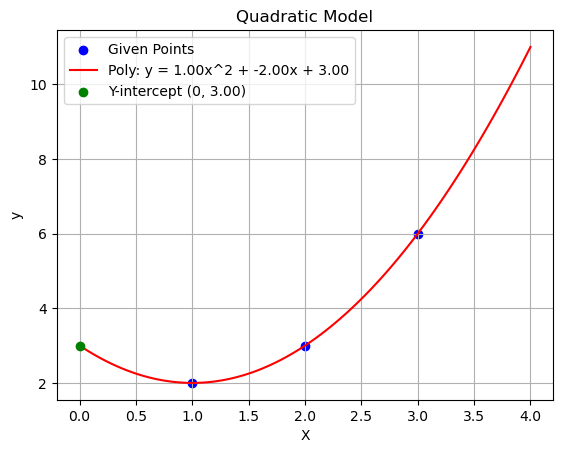

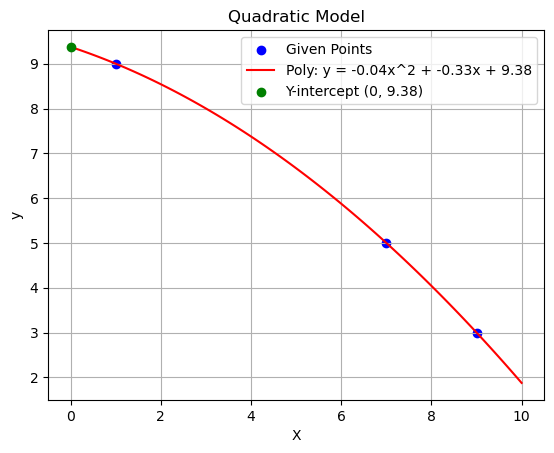

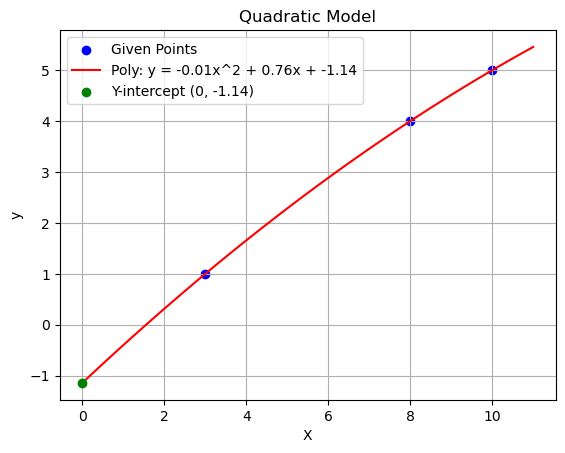

In [90]:
# Function to plot data points and fitted quadratic model
def plot_quadratic_model(X, y, weights):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    
    # Extend x_vals range to include zero for correct visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = weights[0] * x_vals**2 + weights[1] * x_vals + weights[2]
    
    # Plot the fitted polynomial
    plt.plot(x_vals, y_vals, color='red', label=f'Poly: y = {weights[0]:.2f}x^2 + {weights[1]:.2f}x + {weights[2]:.2f}')
    
    # Plot the y-intercept
    plt.scatter(0, weights[2], color='green', zorder=5, label=f'Y-intercept (0, {weights[2]:.2f})')
    
    # Add title and labels
    plt.title('Quadratic Model')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_quadratic_model(X1_quadratic, y1_quadratic, weights1_quadratic)
plot_quadratic_model(X2_quadratic, y2_quadratic, weights2_quadratic)
plot_quadratic_model(X3_quadratic, y3_quadratic, weights3_quadratic)


---
**Task 5 (easy): Making predictions👩‍💻💡**
The cell below contains a new input. Follow these steps to predict a label for the new input:
1. Construct a design matrix with the new input.
2. Use the previously obtained weights to predict a label for the new input. Each set of weights should lead to a different predicted label. Store the predicted label as a separate variable. 
3. Plot the results using the `plot_quadratic_model_with_predictions`
 function. 
4. Compare the plots and the predicted labels obtained with the different weights.
5. Extend the `new_inputs`
 array with the points `1.5`
 and `-1`
. Follow the same steps as above to obtain labels for each input. 
6. Following the above steps should result in 3 predicted labels for each new input. Submit the labels on [Grasple](https://app.grasple.com/#/courses/10532/ci/719265/subjects/15918)



---

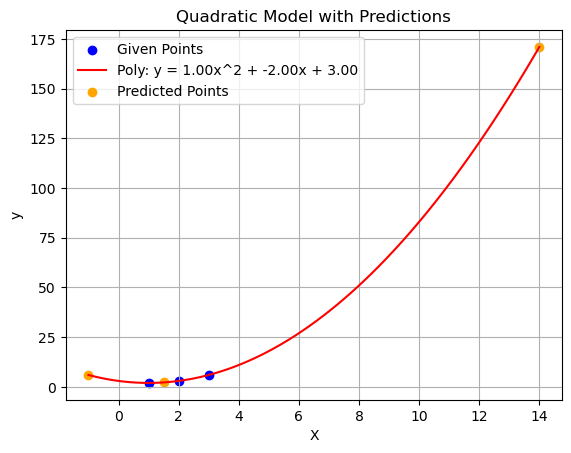

Predicted Labels:  [171.     2.25   6.  ]


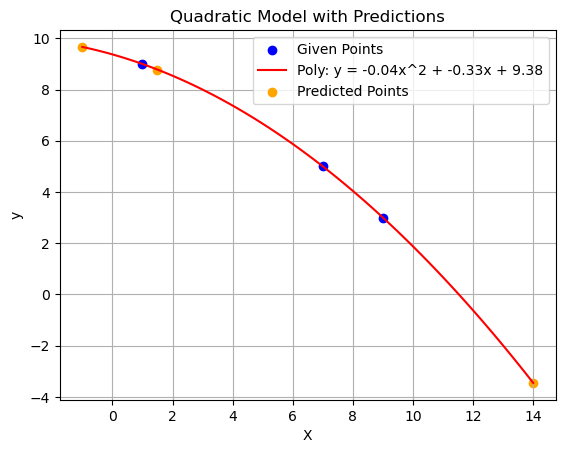

Predicted Labels:  [-3.45833333  8.78125     9.66666667]


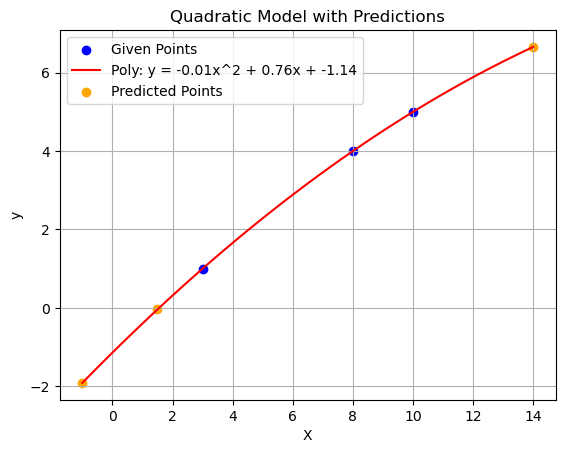

Predicted Labels:  [ 6.65714286 -0.03928571 -1.91428571]


In [91]:
# New array of inputs for prediction
new_input = np.array([14,1.5,-1])

X_design_newinput = np.array([[new_input[0]**2, new_input[0], 1],
                             [new_input[1]**2, new_input[1], 1],
                             [new_input[2]**2, new_input[2], 1]]
                             )

y1_predictions = np.dot(X_design_newinput, weights1_quadratic)
y2_predictions = np.dot(X_design_newinput, weights2_quadratic)
y3_predictions = np.dot(X_design_newinput, weights3_quadratic)


def plot_quadratic_model_with_predictions(X, y, weights, new_input, predicted_labels):
    # Plot the original data points
    plt.scatter(X, y, color='blue', label='Given Points')

    # Plot the fitted quadratic model
    x_vals = np.linspace(min(X.min(), new_input.min()), max(X.max(), new_input.max()), 100)
    y_vals = weights[0] * x_vals**2 + weights[1] * x_vals + weights[2]
    plt.plot(x_vals, y_vals, color='red', label=f'Poly: y = {weights[0]:.2f}x^2 + {weights[1]:.2f}x + {weights[2]:.2f}')

    # Plot the new inputs and their predicted labels
    plt.scatter(new_input, predicted_labels, color='orange', label='Predicted Points')

    # Add title, labels, and legend
    plt.title('Quadratic Model with Predictions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    #Print the predicted labels
    print("Predicted Labels: ", predicted_labels)
    
plot_quadratic_model_with_predictions(X1_quadratic, y1_quadratic, weights1_quadratic, new_input, y1_predictions)
plot_quadratic_model_with_predictions(X2_quadratic, y2_quadratic, weights2_quadratic, new_input, y2_predictions)
plot_quadratic_model_with_predictions(X3_quadratic, y3_quadratic, weights3_quadratic, new_input, y3_predictions)

## 3rd-order Polynomial models
Run the cell below to construct the new dataset:


In [92]:
cubic_dataset = np.array([[7, 6], [5, 24], [8, 60], [1, 120]])


---
**Task 6 (easy): Third order polynomials👩‍💻**
1. Identify the inputs and the labels for each dataset.
2. Create a matrix called `X_cubic`
 to contain the inputs, and the labels in a separate arrays called `y_cubic`
.
3. Calculate the inverse of the design matrix. Remember to add both the quadratic and cubic terms!
4. Reuse the code from previous tasks and find the model weights.


---

In [93]:
# Write your solution here
#Design matrix goes:
# x^3, x^2, x, 1

def construct_design_matrix_cubic(x_vals):
    
    # Create a column of ones
    ones_column = np.ones((len(x_vals), 1))

    # Create a column of x values
    x_column = x_vals

    # Create a column of x^2 values
    x_squared_column = x_vals**2
    
    # Create a column of x^3 values
    x_cubed_column = x_vals**3

    # Combine all columns into a single design matrix
    design_matrix = np.hstack((x_cubed_column, x_squared_column, x_column, ones_column))

    return design_matrix

X_cubic, y_cubic = separate_inputs_labels(cubic_dataset)
X_cubic_design = construct_design_matrix_cubic(X_cubic)

print("Design Matrix for Cubic Dataset:\n", X_cubic_design)

X_cubic_inv = np.linalg.inv(X_cubic_design)
weights_cubic = np.dot(X_cubic_inv, y_cubic)

print("Weights for Cubic Model:", weights_cubic)

Design Matrix for Cubic Dataset:
 [[343.  49.   7.   1.]
 [125.  25.   5.   1.]
 [512.  64.   8.   1.]
 [  1.   1.   1.   1.]]
Weights for Cubic Model: [  2.64285714 -31.85714286  85.21428571  64.        ]



---
**Task 7 (easy): Plotting👩‍💻💡**
1. Use the `plot_cubic_model`
 function to plot the results.
2. Visually inspect the plots and interpret the meaning and influence of each term.
3. Compare the current results to the previous models. Based on the plots, which model shows the best fit?

ANSWER: Well...it kinda depends, as one might argue that this model is overfitting. On the other hand, if this is the desired result, then it is able to fit better than previously linear and 2nd order model. More data is needed, especially unseen testing data!


---

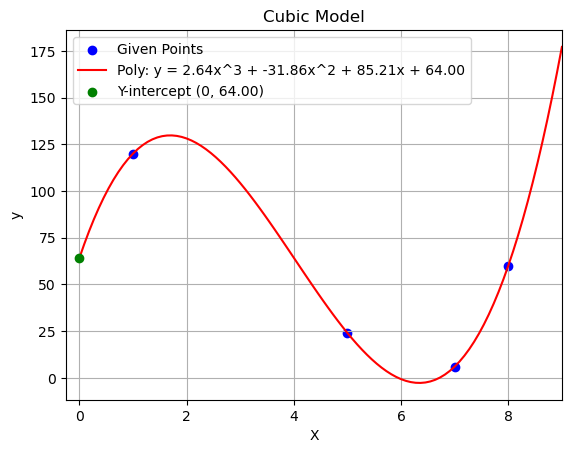

In [94]:
# Function to plot data points and fitted cubic model
def plot_cubic_model(X, y, weights):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    
    # Extend x_vals range to include zero for correct visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = weights[0] * x_vals**3 + weights[1] * x_vals**2 + weights[2] * x_vals + weights[3]
    
    # Plot the fitted polynomial
    plt.plot(x_vals, y_vals, color='red', label=f'Poly: y = {weights[0]:.2f}x^3 + {weights[1]:.2f}x^2 + {weights[2]:.2f}x + {weights[3]:.2f}')
    
    # Plot the y-intercept
    plt.scatter(0, weights[3], color='green', zorder=5, label=f'Y-intercept (0, {weights[3]:.2f})')
    
    # Add title and labels
    plt.title('Cubic Model')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.xlim([-0.25, max(X) + 1])  # Ensure the x-axis starts from 0
    plt.show()

plot_cubic_model(X_cubic, y_cubic, weights_cubic)


---
**Task 8 (easy): Making predictions👩‍💻💡**
Implement the following steps to use the 3rd order polynomial model for predicting new labels for the `new_inputs`
 array defined below.
1. Construct the design matrix using the `new_inputs`
. 
2. Use the previously obtained cubic weights to predict a label for the new inputs. 
3. Plot the results using the `plot_cubic_model_with_predictions`
 function.
4. Compare the predictions of the cubic model with the predicitons of the quadratic models.


---

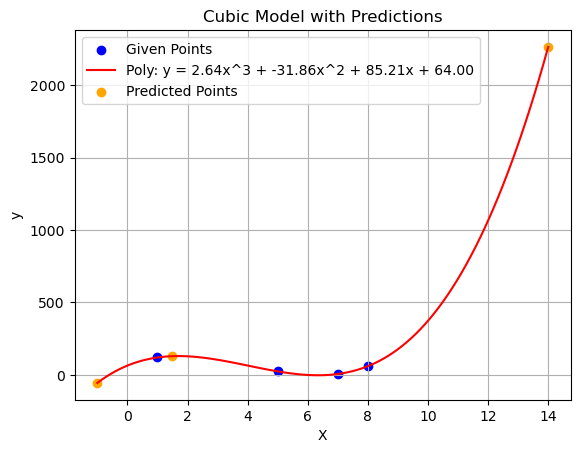

In [97]:
new_inputs_x = np.array([[14], [1.5], [-1]])

#design matrix for new inputs
X_design_newinputs = construct_design_matrix_cubic(new_inputs_x)

predicted_labels_y = X_design_newinputs @ weights_cubic

# Function to plot data points, fitted cubic model, and predictions
def plot_cubic_model_with_predictions(X, y, weights, new_inputs, predicted_labels):
    # Plot the original data points
    plt.scatter(X, y, color='blue', label='Given Points')

    # Plot the fitted cubic model
    x_vals = np.linspace(min(min(X), min(new_inputs)), max(max(X), max(new_inputs)), 100)
    y_vals = weights[0] * x_vals**3 + weights[1] * x_vals**2 + weights[2] * x_vals + weights[3]
    plt.plot(x_vals, y_vals, color='red', label=f'Poly: y = {weights[0]:.2f}x^3 + {weights[1]:.2f}x^2 + {weights[2]:.2f}x + {weights[3]:.2f}')

    # Plot the new inputs and their predicted labels
    plt.scatter(new_inputs, predicted_labels, color='orange', label='Predicted Points')

    # Add title, labels, and legend
    plt.title('Cubic Model with Predictions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
plot_cubic_model_with_predictions(X_cubic, y_cubic, weights_cubic, new_inputs_x, predicted_labels_y)